In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

In [3]:
from ml import Ml
from preprocess import Preprocess
from clean_data import CleanData
from plot import Plot

In [4]:
train_store = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\train_store.csv', engine = 'python')
test = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\test.csv')

In [11]:
ml = Ml()
clean = CleanData()
plot = Plot()

In [6]:
pre = Preprocess()

In [7]:
train_store.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


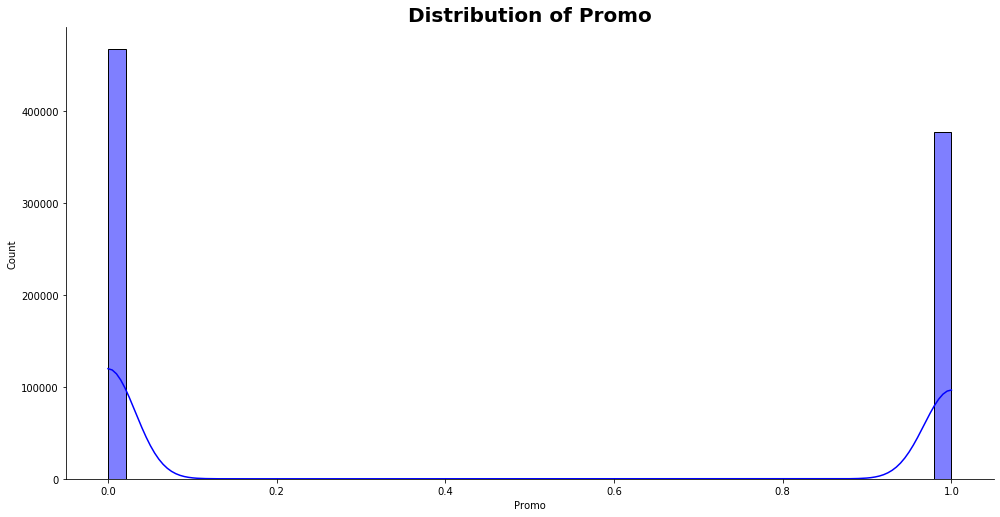

In [12]:
plot.plot_hist(train_store, 'Promo', color='blue')

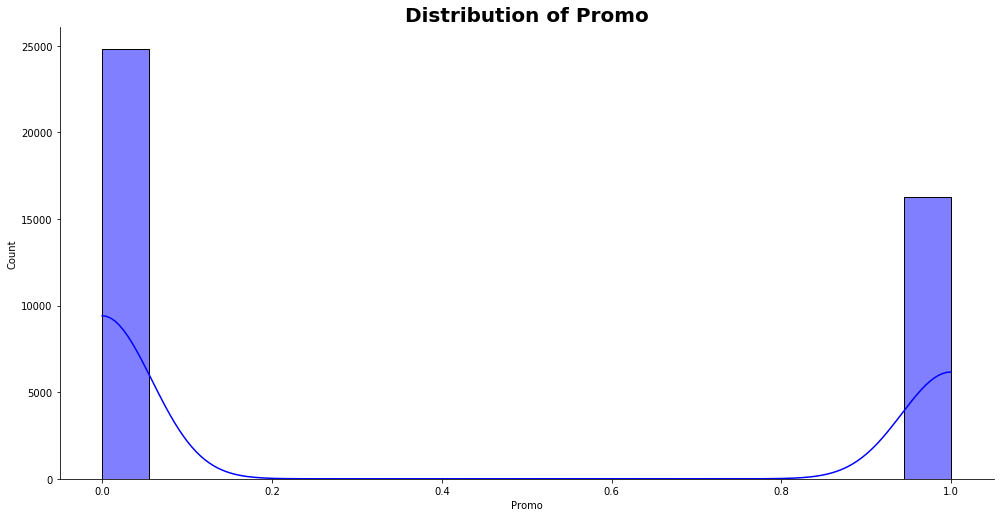

In [13]:
plot.plot_hist(test, 'Promo', color='blue')

#### the distrbution between for the train set and test is not equal which for there were more Promos for the train_store data set

In [61]:
train_store.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [54]:
train_store.groupby('Store')["StateHoliday"]

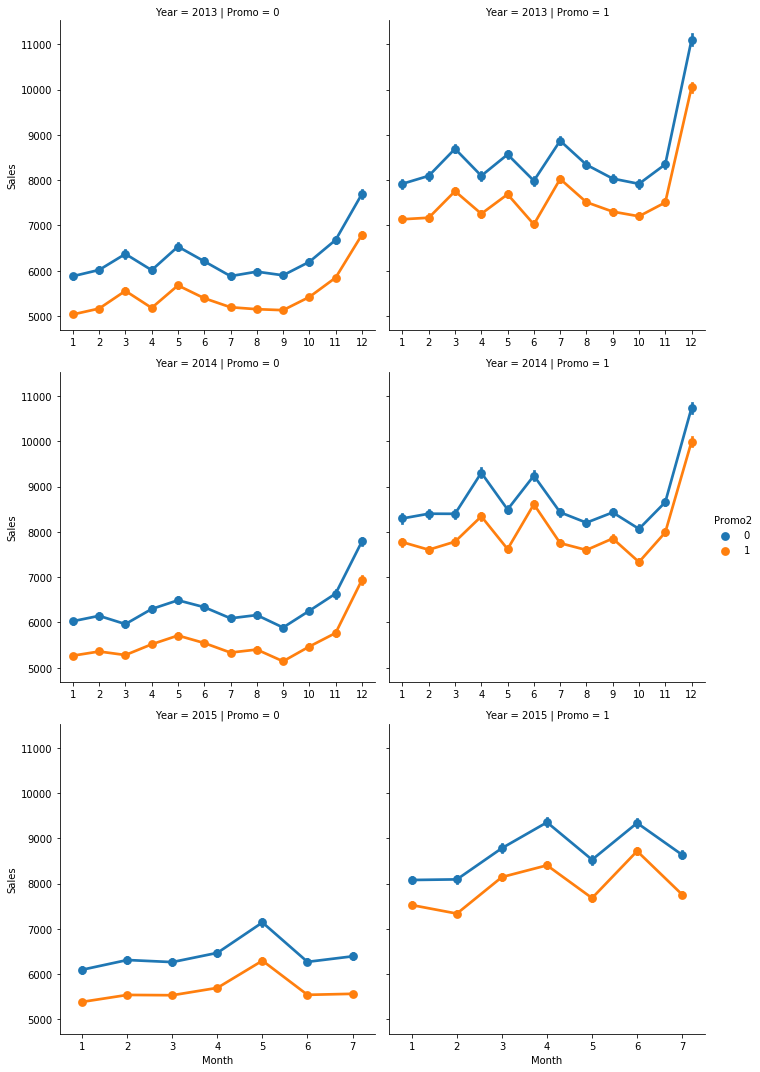

In [47]:
sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

- we can see that around holidays for christtmas (on the 12 month) and easter (around  the 4 month) there is high sales because of the special deals that stores offer 
- but after a while or way before the holiday sales decreases. 
- it maybe cause of people close to the holidays might wait for the special offers.
- and after holidays the sales might decrease because of most people might have benefited from the holidays special offer
- we can also see a seasonal trend on christmas and then rapidly declining but there is no data to show for 2015

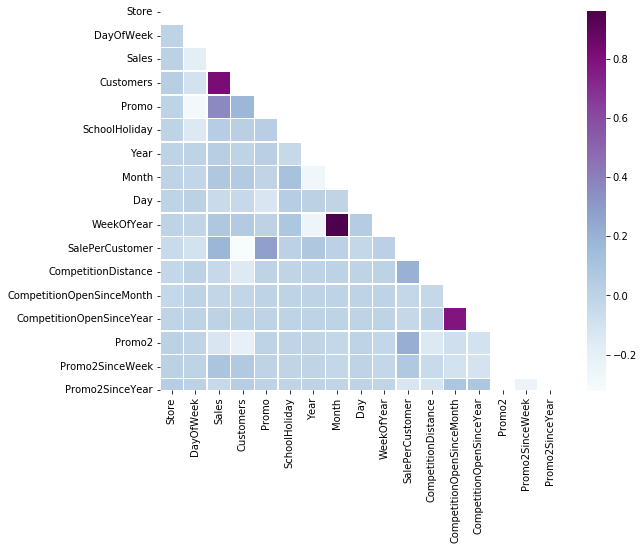

In [63]:
# Compute the correlation matrix 
# exclude 'Open' and Unnamed: 0 variable
corr_all = train_store.drop(['Open','Unnamed: 0'], axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (9, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()


In [62]:
# corr = train_store['Sales'].corr(train_store['Customers']).corr()
# print("correlation between Sales and customers are", corr)
from scipy.stats import pearsonr
corr, _ = pearsonr(train_store['Sales'], train_store['Customers'])
print('the correlation between sales and customers is: %.3f' % corr)

the correlation between sales and customers is: 0.824


# the correlation between is very high meaning when sales go up customers as well go up and vice versa

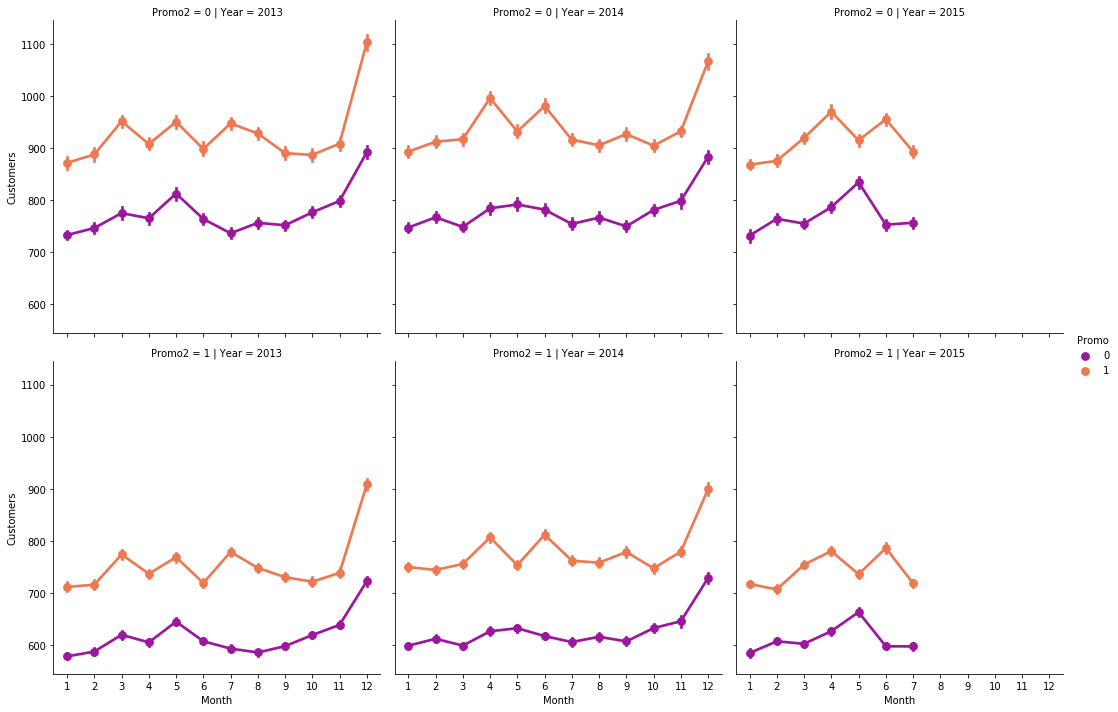

In [67]:
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'Year', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               row = 'Promo2', # per store type in rows
               )

# We can see that the Promo significatly helps increases of Customers and even more customers generates when a Promo2 is run.  Also, even there is no Promo there will still be existing customers but lesser 

In [92]:
# cols = [1,3,4,6,14,19]
# sales_store = train_store[train_store.columns[cols]]
# sales_store
sales_store = train_store.groupby('Store').agg({'SalePerCustomer':'count', 'Sales' :'mean', 'Customers':'mean', 'Promo' :'mean','Promo2':'mean'})
sales_store

,SalePerCustomer,Sales,Customers,Promo,Promo2
Store,,,,,
1,781,4759.096031,564.049936,0.448143,0
2,784,4953.900510,583.998724,0.451531,1
3,779,6942.568678,750.077022,0.449294,1
4,784,9638.401786,1321.752551,0.450255,0
5,779,4676.274711,537.340180,0.450578,0
...,...,...,...,...,...
1111,779,5251.702182,451.711168,0.449294,1
1112,779,10236.577664,838.608472,0.449294,0
1113,784,6627.859694,717.029337,0.450255,0


# it shows that there is no much difference between 

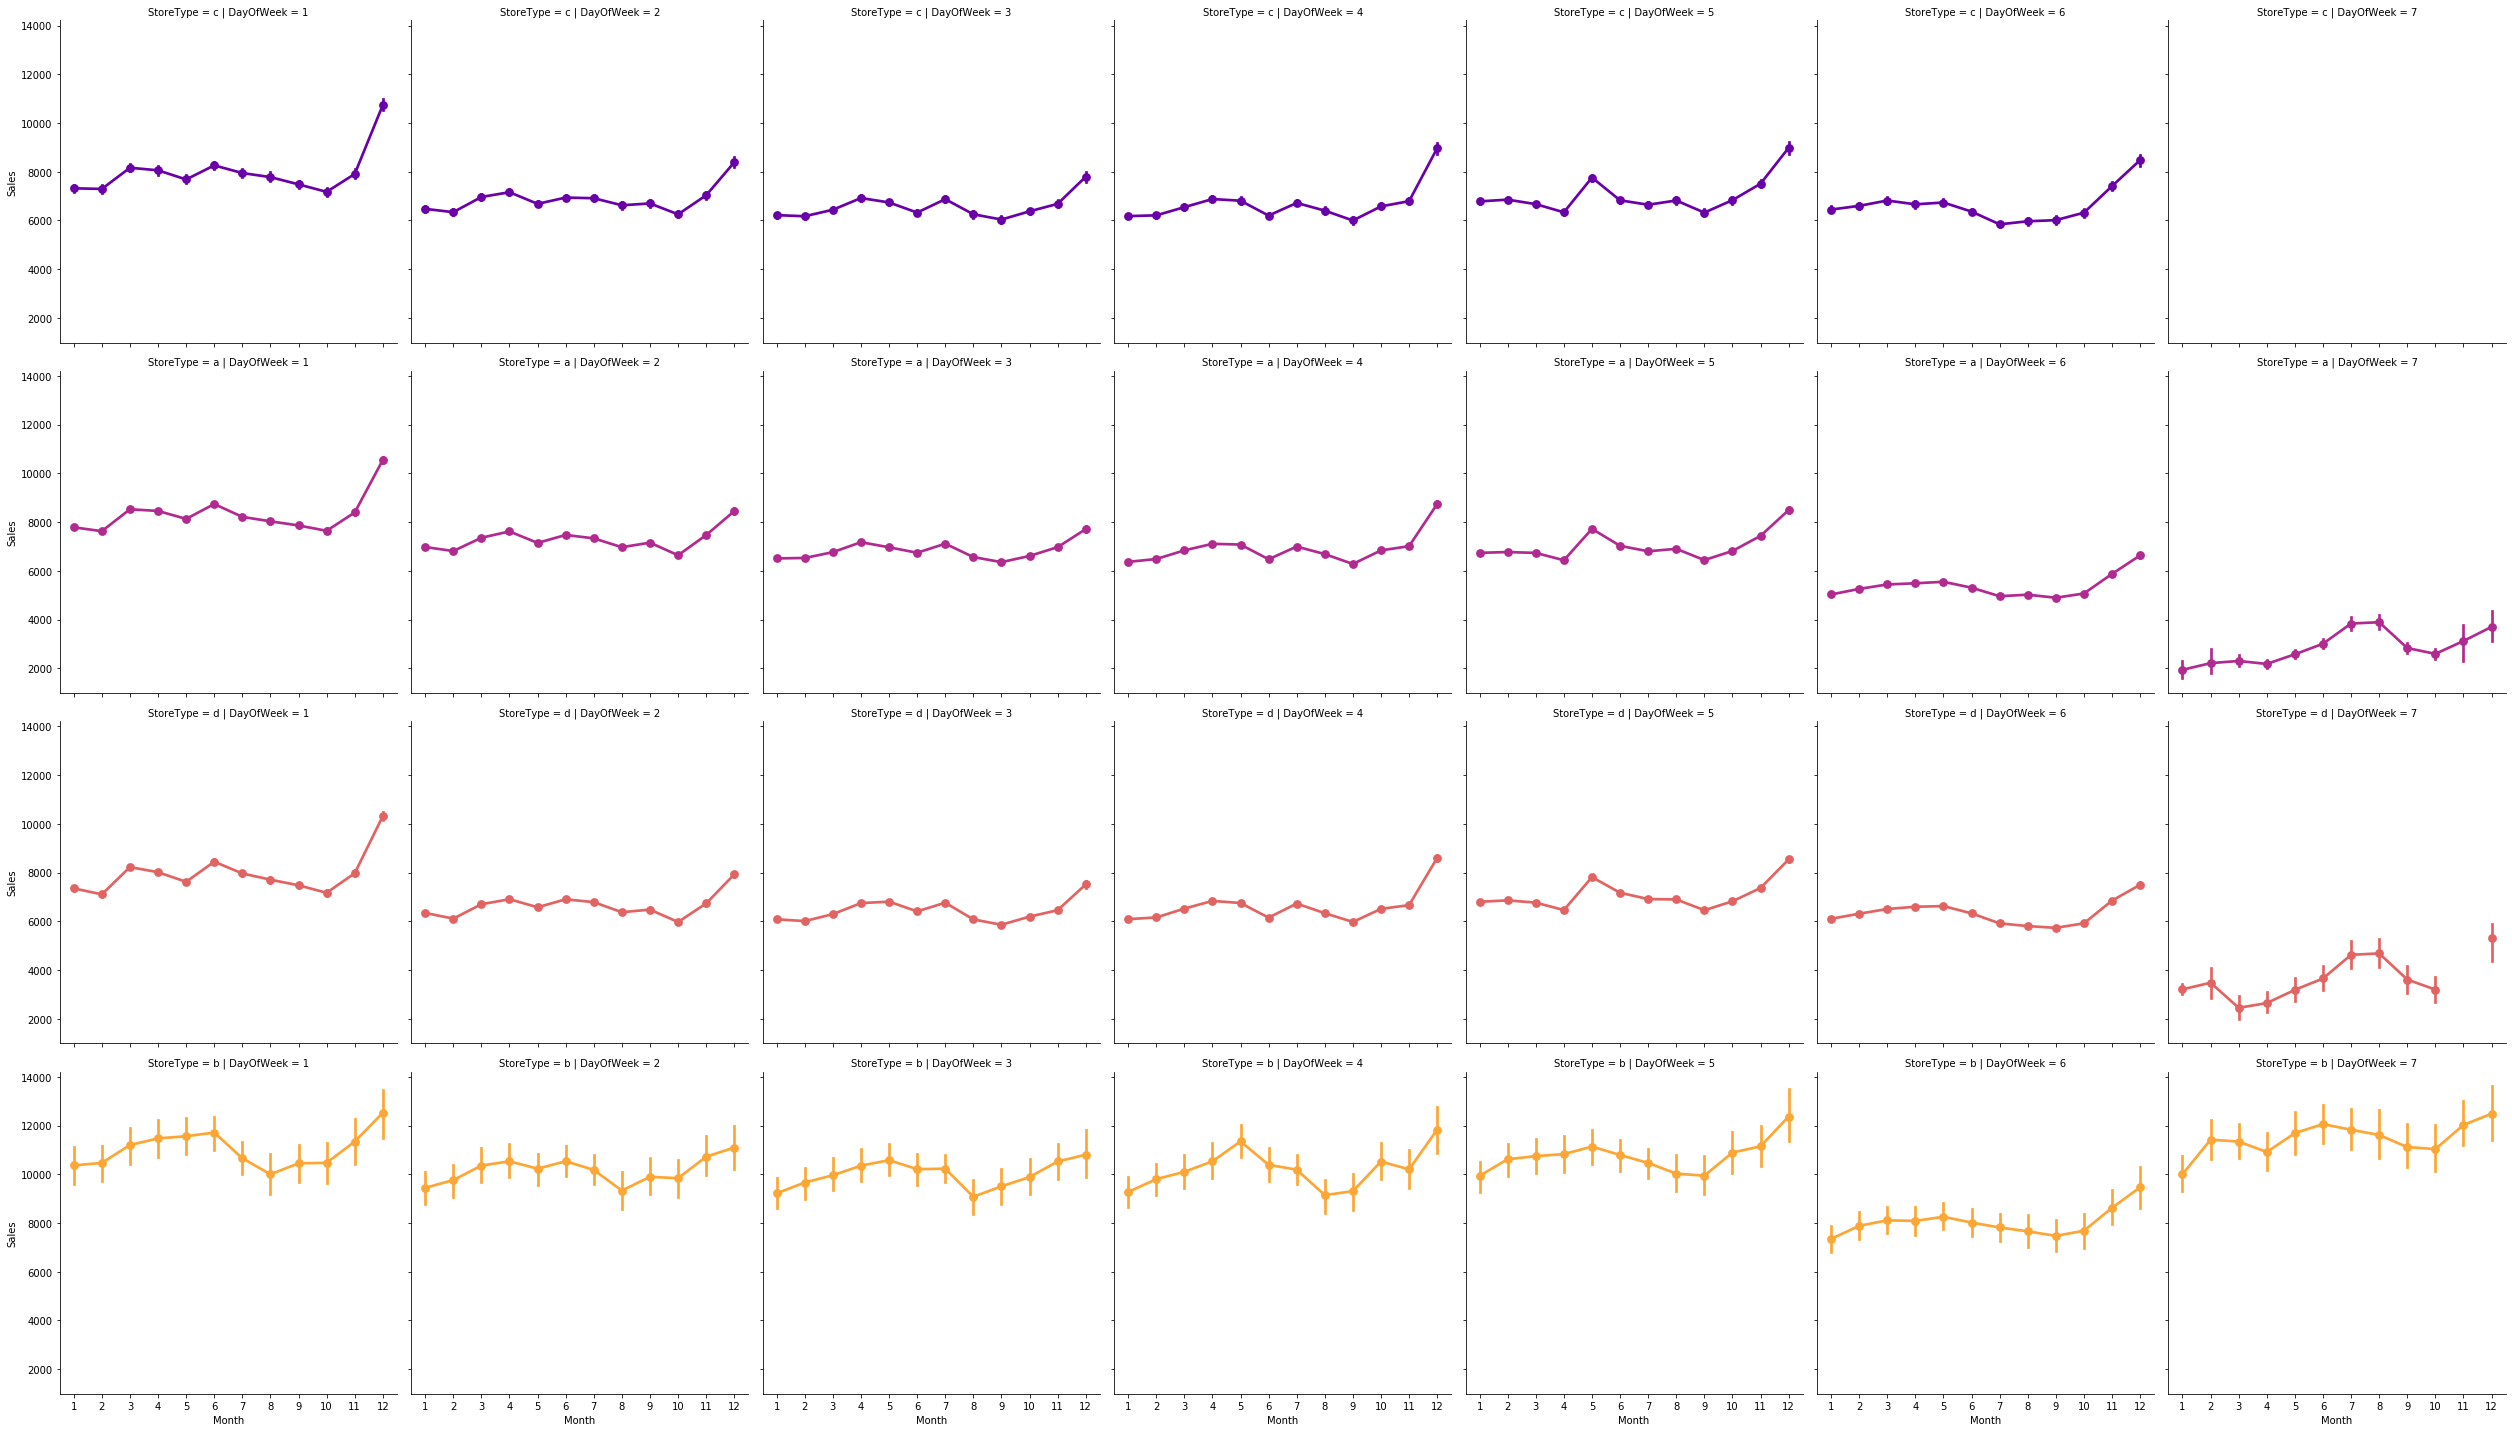

In [95]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = 'blue') 

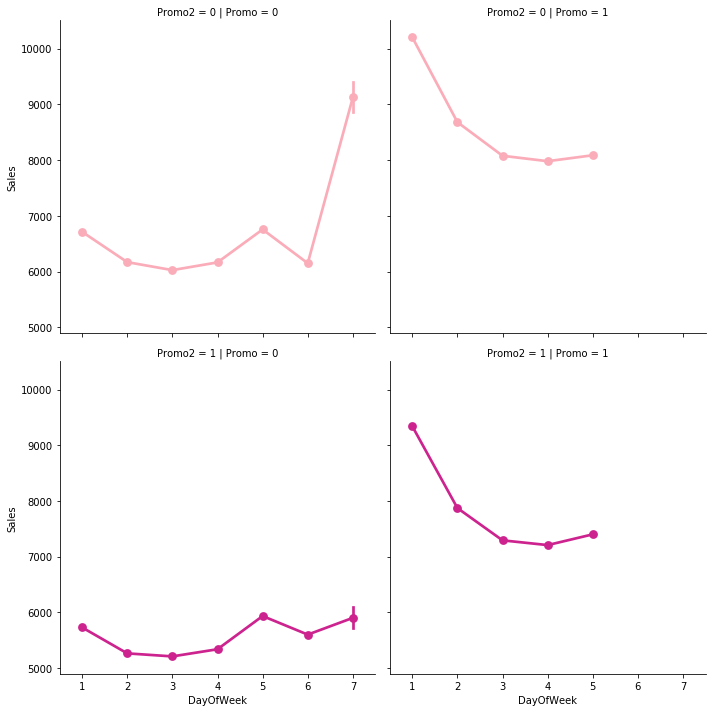

In [100]:
# sale per customer trends
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu') 

In [99]:
train_store.groupby('DayOfWeek').agg({'Sales':'count'})

,Sales
DayOfWeek,
1,137557
2,143955
3,141922
4,134626
5,138633
6,144052
7,3593


- we can see that customers from monday - friday are common trend while on weekdays open or not customers are very few except for store type 'b' which besides saturday has very high sales and customer also has the highest sales
- besides store type 'c' all stores work on the sunday. also october to november store 'd' was closed on sunday
- and we can see from the tabel that the Sales generated for Sunday is much lesser cause of some stores not working and the one who does has a very small customers on that day

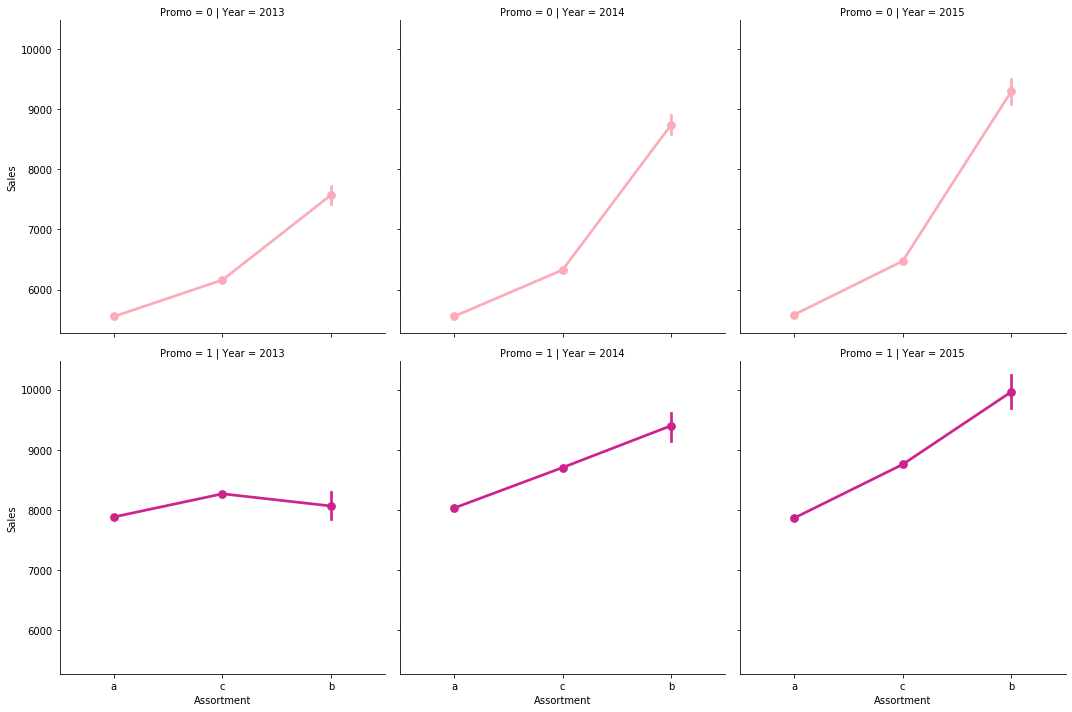

In [104]:
sns.factorplot(data = train_store, x = 'Assortment', y = "Sales", 
               col = 'Year', 
               row = 'Promo',
               hue = 'Promo',
               palette = 'RdPu') 

# It shows that assortment 'b' has the highest sales revenue

In [108]:
train_store['CompetitionDist']=pd.cut(train_store['CompetitionDistance'], 5)
train_store.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionDist_Cat,CompetitionDist
0,0,1,5,5263.0,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,"(-55.84, 15188.0]","(-55.84, 15188.0]"
1,1,2,5,6064.0,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct","(-55.84, 15188.0]","(-55.84, 15188.0]"
2,2,3,5,8314.0,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct","(-55.84, 15188.0]","(-55.84, 15188.0]"
3,3,4,5,13995.0,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,"(-55.84, 15188.0]","(-55.84, 15188.0]"
4,4,5,5,4822.0,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,"(15188.0, 30356.0]","(15188.0, 30356.0]"


In [109]:
train_store.groupby(by="CompetitionDist").Sales.mean(),train_store.groupby(by="CompetitionDist").Customers.mean()

(CompetitionDist
 (-55.84, 15188.0]     6957.360876
 (15188.0, 30356.0]    7041.604692
 (30356.0, 45524.0]    6471.923562
 (45524.0, 60692.0]    5980.114445
 (60692.0, 75860.0]    7775.446449
 Name: Sales, dtype: float64, CompetitionDist
 (-55.84, 15188.0]     771.345223
 (15188.0, 30356.0]    691.574605
 (30356.0, 45524.0]    680.101854
 (45524.0, 60692.0]    643.988246
 (60692.0, 75860.0]    914.574972
 Name: Customers, dtype: float64)

- As we can see here, like i thought, the stores that are the furthest have the highest average sales and number of customers
- This doesn't mean automatically that the furthest the better, but it does shed light on the fact that when there are no competition nearby, stores tend to sell more and have more customers because there are almost a monopoly in this region.